# Homework 3: Exploratory Data Analysis
Jack Sullivan
February 27, 2022
[Dataset](https://www.kaggle.com/nitinsss/military-expenditure-of-countries-19602019)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display


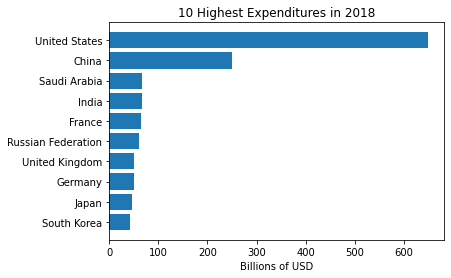

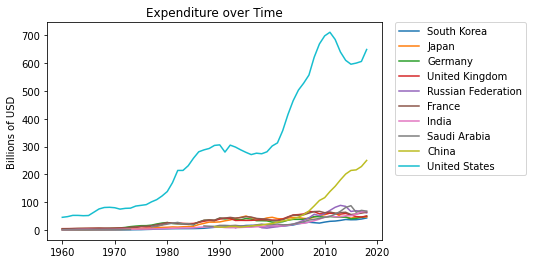

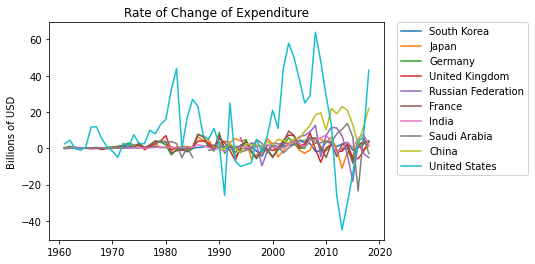

,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08
2,Angola,AGO,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09
3,Albania,ALB,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
4,Andorra,AND,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,2.722709e+07,3.857812e+07,5.096886e+07,4.339040e+07,4.859768e+07,5.357579e+07,4.998416e+07,5.193762e+07,5.726263e+07,6.334407e+07
260,"Yemen, Rep.",YEM,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,1.420775e+09,1.448153e+09,1.612254e+09,1.618840e+09,1.648751e+09,1.714831e+09,NaN,NaN,NaN,NaN
261,South Africa,ZAF,Country,Military expenditure (current USD),69999972.0,113749954.5,186199925.5,188999924.4,271599891.4,289449884.2,...,3.592688e+09,4.188168e+09,4.594154e+09,4.489590e+09,4.118208e+09,3.892469e+09,3.488868e+09,3.169756e+09,3.638937e+09,3.639879e+09
262,Zambia,ZMB,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,2.209623e+08,2.801878e+08,3.091138e+08,3.463014e+08,3.813458e+08,4.436044e+08,3.724476e+08,2.995048e+08,3.396645e+08,3.780254e+08


In [38]:
data = pd.read_csv("data.csv")
data = data.loc[data["Type"] == "Country"]

highest_spending_2018 = data.nlargest(10, "2018").loc[::-1]

plt.title("10 Highest Expenditures in 2018")
plt.barh(highest_spending_2018["Name"], highest_spending_2018["2018"].div(1000000000))
plt.xlabel("Billions of USD")
plt.show()

years = list(map(str, [*range(1960, 2019)]))

plt.title("Expenditure over Time")

for country in highest_spending_2018["Name"]:
    expenditures = []   
    for y in years:
        spending = highest_spending_2018.loc[highest_spending_2018["Name"] == country, y].values[0]
        expenditures.append(spending/1000000000)

    plt.plot([*range(1960, 2019)], expenditures, label=country)

plt.ylabel("Billions of USD")
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show()

    
derivative = data.filter(["Name"], axis=1)

for year in years[1:]:
    derivative[year] = highest_spending_2018[year] - highest_spending_2018[str(int(year)-1)]

plt.title("Rate of Change of Expenditure")

for country in highest_spending_2018["Name"]:
    expenditures = []   
    for y in years[1:]:
        spending = derivative.loc[derivative["Name"] == country, y].values[0]
        expenditures.append(spending/1000000000)

    plt.plot([*range(1961, 2019)], expenditures, label=country)

plt.ylabel("Billions of USD")
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show()

display(data)